In [1]:
import os
if os.name == 'nt':
    %env DOC=C:\Users\BK\Documents
else:
    %env DOC=/Users/muuzh/Documents

env: DOC=C:\Users\BK\Documents


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm, trange
from tqdm.contrib import tenumerate
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import time
import itertools
import scipy.io
import jpype
from AMI import automutual_info_single, automutual_info




C:\Users\BK\Documents\JIDT\infodynamics.jar


In [5]:
a_num = 100
lag1para = np.linspace(0, 1, a_num)
series_length = 2000
ARpara = [np.r_[1, -arparams] for arparams in lag1para]
sample_size = 20
# For each parameter, generate 20 AR time series
# Use a 3d numpy array to store the results, with placeholder nan
AR1matrix = np.full((a_num, sample_size, series_length), np.nan)
for i, ar in enumerate(tqdm(ARpara)):
    AR1matrix[i] = [ArmaProcess(ar, [1]).generate_sample(series_length) for _ in range(sample_size)]



  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
# compute all samples for all parameters
AMI = automutual_info(AR1matrix, 1, 3)

Processing:   0%|          | 0/2000 [00:00<?, ?it/s]

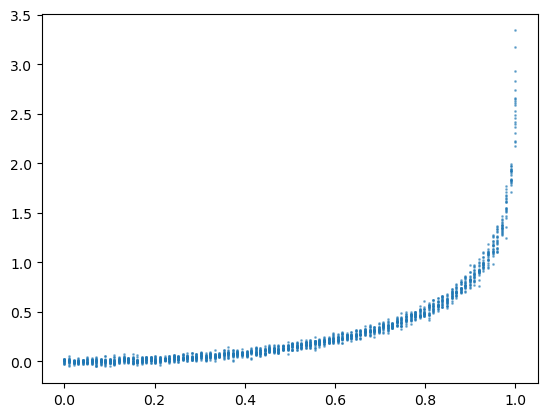

In [7]:
plt.scatter(np.repeat(lag1para, sample_size), AMI, s=1, alpha=0.5)

In [9]:
automutual_info(AR1matrix[0,:,:], 1, 3)

Processing:   0%|          | 0/20 [00:00<?, ?it/s]

array([ 0.02177724,  0.02273935,  0.01511693, -0.02334942, -0.02225817,
        0.00971365,  0.02900476,  0.00422422, -0.00031523,  0.01795294,
       -0.00715826,  0.0005035 ,  0.01077742, -0.01275283, -0.01342707,
        0.01493344, -0.01000232,  0.01131727,  0.016374  ,  0.02265111])